In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Eluvio_DS_Challenge.csv')
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [3]:
vocab_size = 10000
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [4]:
df.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [5]:
df.drop(['down_votes', 'category', 'time_created', 'date_created'], axis=1, inplace=True)
df['over_18'] = LabelEncoder().fit_transform(df['over_18'])

In [6]:
df.head()

,up_votes,title,over_18,author
0,3,Scores killed in Pakistan clashes,0,polar
1,2,Japan resumes refuelling mission,0,polar
2,3,US presses Egypt on Gaza border,0,polar
3,1,Jump-start economy: Give health care to all,0,fadi420
4,4,Council of Europe bashes EU&UN terror blacklist,0,mhermans


In [7]:
x = df['title']
y = df['over_18']

In [8]:
x_train = x[:400000]
y_train = y[:400000]
x_val = x[400000:450000]
y_val = y[400000:450000]
x_test = x[450000:]
y_test = y[450000:]

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
val_sequences = tokenizer.texts_to_sequences(x_val)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [11]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
val_padded = np.array(val_padded)
val_labels = np.array(y_val)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [14]:
num_epochs = 20
history = model.fit(training_padded, training_labels,
                    epochs=num_epochs, validation_data=(val_padded, val_labels), verbose=2)

Epoch 1/20
12500/12500 - 12s - loss: 0.0083 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9996
Epoch 2/20
12500/12500 - 12s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0041 - val_accuracy: 0.9996
Epoch 3/20
12500/12500 - 12s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 0.9996
Epoch 4/20
12500/12500 - 12s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0047 - val_accuracy: 0.9996
Epoch 5/20
12500/12500 - 12s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 6/20
12500/12500 - 12s - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 0.9996
Epoch 7/20
12500/12500 - 13s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9996
Epoch 8/20
12500/12500 - 12s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0049 - val_accuracy: 0.9996
Epoch 9/20
12500/12500 - 13s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9996
Epoch 10/20
12500/12500 - 12s - loss: 0.0018 - accuracy

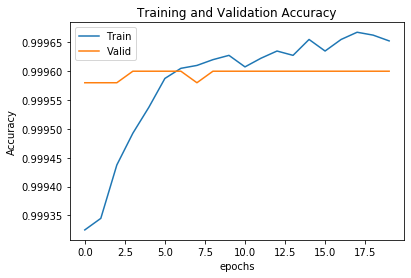

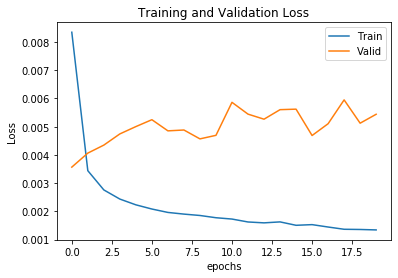

In [15]:
def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    plt.figure(1)
    plt.plot(acc, label='Training accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(['Train', 'Valid'])
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.show()
    
    plt.figure(2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Train', 'Valid'])
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.show
    
plot_history(history)

In [16]:
model.evaluate(testing_padded, testing_labels)

1852/1852 [==============================] - 1s 484us/step - loss: 0.0065 - accuracy: 0.9995


[0.006464100442826748, 0.9994935393333435]

In [17]:
model.predict(testing_padded[0])

array([[5.3741145e-32],
       [0.0000000e+00],
       [7.4165990e-05],
       [7.8380108e-04],
       [1.5786618e-02],
       [9.7482967e-01],
       [0.0000000e+00],
       [8.1439852e-13],
       [1.0000000e+00],
       [1.3137114e-14],
       [6.2168392e-25],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04]], dtype=float32)

In [18]:
model.predict(testing_padded[10])

array([[8.8451482e-18],
       [0.0000000e+00],
       [1.1225045e-03],
       [5.7348995e-12],
       [0.0000000e+00],
       [6.0959756e-03],
       [6.2168392e-25],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04],
       [3.6856532e-04]], dtype=float32)

In [19]:
model.save('model.h5')